Assignment----2

In [31]:
pip install mdtraj

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [7]:
colvar_A=np.loadtxt('../Data/PI/A/COLVAR',comments=['#'])
colvar_B=np.loadtxt('../Data/PI/B/COLVAR',comments=['#'])

traj_A=md.load_xtc('../Data/PI/A/traj_comp.xtc',top='../Data/PI/A/confout.gro')
traj_B=md.load_xtc('../Data/PI/B/traj_comp.xtc',top='../Data/PI/B/confout.gro')

In [8]:
phi_indices_A, phi_A=md.compute_phi(traj_A)
psi_indices_A, psi_A=md.compute_psi(traj_A)

phi_indices_B, phi_B=md.compute_phi(traj_B)
psi_indices_B, psi_B=md.compute_psi(traj_B)

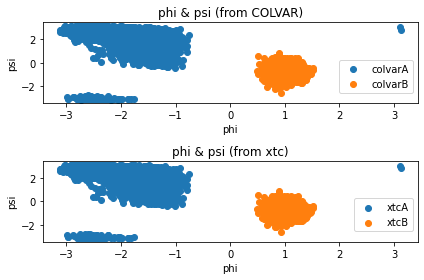

In [32]:
plt.subplot(211)
plt.scatter(colvar_A[:,1],colvar_A[:,2],label='colvarA')
plt.scatter(colvar_B[:,1],colvar_B[:,2],label='colvarB')
plt.legend(bbox_to_anchor=(1,0.6))
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('phi & psi (from COLVAR)')


plt.subplot(212)
plt.scatter(phi_A[::10],psi_A[::10],label='xtcA')
plt.scatter(phi_B[::10],psi_B[::10],label='xtcB')
plt.legend(bbox_to_anchor=(1,0.6))
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('phi & psi (from xtc)')

plt.tight_layout()
plt.savefig('../Figures/2_PI_phi_psi.png')

In [12]:
phi_Asd=np.std(phi_A)
psi_Asd=np.std(psi_A)

phi_Bsd=np.std(phi_B)
psi_Bsd=np.std(psi_B)

print('phi_Asd='+str(phi_Asd))
print('psi_Asd='+str(psi_Asd))
print('phi_Bsd='+str(phi_Bsd))
print('psi_Bsd='+str(psi_Bsd))

phi_Asd=0.5538316
psi_Asd=1.024898
phi_Bsd=0.13238177
psi_Bsd=0.34453443


Assignment----3

In [22]:
task3_grid=np.loadtxt('../Data/Lu/lugano.grid.dat',comments=['#'])
task3_colvar=np.loadtxt('../Data/Lu/COLVAR',comments=['#'])
task3_hills=np.loadtxt('../Data/Lu/HILLS',comments=['#'])

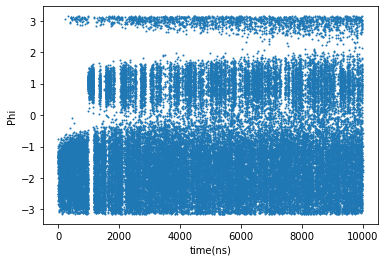

In [33]:
plt.scatter(task3_colvar[:,0][::10],task3_colvar[:,1][::10],s=1)
plt.xlabel('time(ns)')
plt.ylabel('Phi')
plt.savefig('../Figures/3_Lu_phi_time.png')

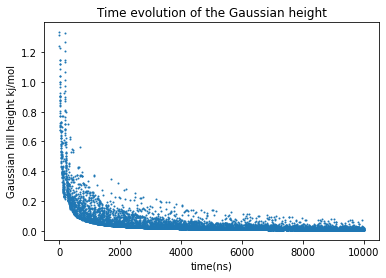

In [34]:
plt.scatter(task3_hills[:,0],task3_hills[:,3],s=1)
plt.xlabel('time(ns)')
plt.ylabel('Gaussian hill height kj/mol')
plt.title('Time evolution of the Gaussian height')
plt.savefig('../Figures/3_Lu_TE_GH.png')

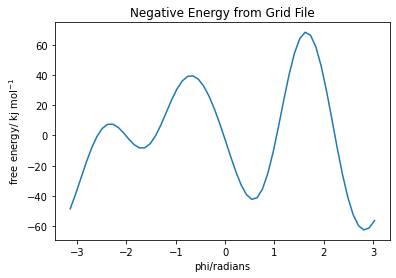

In [35]:
plt.plot(task3_grid[:,0],-task3_grid[:,2])
plt.title('Negative Energy from Grid File')
plt.xlabel('phi/radians')
plt.ylabel('free energy/ kj mol$^{-1}$')
plt.savefig('../Figures/3_Lu_Nege_Energy.png')

Assignment----4

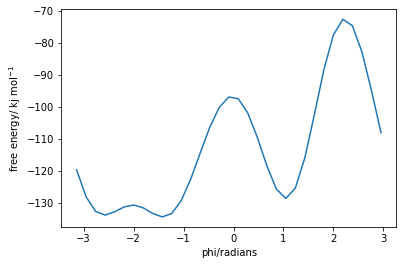

In [36]:
task4_fes=np.loadtxt('../Data/Lu/fes.dat',comments=['#'])
plt.plot(task4_fes[:,0],task4_fes[:,1])
plt.xlabel('phi/radians')
plt.ylabel('free energy/ kj mol$^{-1}$')
plt.savefig('../Figures/4_Lu_fes.png')

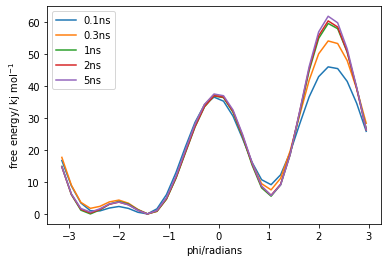

In [37]:
task4_01=np.loadtxt('../Data/Lu/fes_1.dat',comments=['#'])
task4_03=np.loadtxt('../Data/Lu/fes_3.dat',comments=['#'])
task4_10=np.loadtxt('../Data/Lu/fes_10.dat',comments=['#'])
task4_20=np.loadtxt('../Data/Lu/fes_20.dat',comments=['#'])
task4_50=np.loadtxt('../Data/Lu/fes_50.dat',comments=['#'])
plt.plot(task4_01[:,0],task4_01[:,1],label='0.1ns')
plt.plot(task4_03[:,0],task4_03[:,1],label='0.3ns')
plt.plot(task4_10[:,0],task4_10[:,1],label='1ns')
plt.plot(task4_20[:,0],task4_20[:,1],label='2ns')
plt.plot(task4_50[:,0],task4_50[:,1],label='5ns')
plt.xlabel('phi/radians')
plt.ylabel('free energy/ kj mol$^{-1}$')
plt.legend()
plt.savefig('../Figures/4_Lu_All_energy.png')

Assignment----6

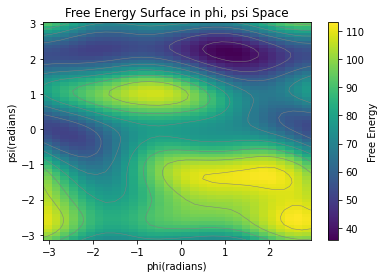

In [39]:
data = np.loadtxt('../Data/2D/lugano.grid.dat',comments=['#'])
phi = data[:, 0]  # assuming the first column is phi
psi = data[:, 1]  # assuming the second column is psi
fes = data[:, 2]  # free energy values

unique_phi = np.unique(data[:, 0])
unique_psi = np.unique(data[:, 1])

fe_sur= np.empty((len(unique_phi), len(unique_psi)))

for row in data:
    phi_idx = np.where(unique_phi == row[0])[0][0]
    psi_idx = np.where(unique_psi == row[1])[0][0]
    fe_sur[phi_idx, psi_idx] = row[2]

plt.imshow(fe_sur, origin='lower', aspect='auto',extent=[unique_psi.min(), unique_psi.max(),unique_phi.min(), unique_phi.max()])
plt.colorbar(label='Free Energy')
CS = plt.contour(unique_psi, unique_phi, fe_sur, colors='grey', linewidths=0.5)
plt.xlabel('phi(radians)')
plt.ylabel('psi(radians)')
plt.title('Free Energy Surface in phi, psi Space')
plt.savefig('../Figures/6_2D_FES.png')


In [17]:
pip install imageio

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 3.3 MB 2.0 MB/s            
     |████████████████████████████████| 3.1 MB 59.2 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [20]:
import imageio
import os

def plot_fes(data, filename):
    phi = data[:, 0]  # assuming the first column is phi
    psi = data[:, 1]  # assuming the second column is psi
    fes = data[:, 2]  # free energy values
    unique_phi = np.unique(data[:, 0])
    unique_psi = np.unique(data[:, 1])

    fe_sur= np.empty((len(unique_phi), len(unique_psi)))

    for row in data:
        phi_idx = np.where(unique_phi == row[0])[0][0]
        psi_idx = np.where(unique_psi == row[1])[0][0]
        fe_sur[phi_idx, psi_idx] = row[2]

    plt.imshow(fe_sur, origin='lower', aspect='auto',extent=[unique_psi.min(), unique_psi.max(),unique_phi.min(), unique_phi.max()])
    plt.colorbar(label='Free Energy')
    CS = plt.contour(unique_psi, unique_phi, fe_sur, colors='grey', linewidths=0.5)
    plt.xlabel('phi(radians)')
    plt.ylabel('psi(radians)')
    plt.title('Free Energy Surface in phi, psi Space')
    plt.savefig(filename)
    plt.close()

N=100
# Create individual frames for the GIF
filenames = []
for i in range(0, N+1):  # Replace N with the actual number of FES files
    data = np.loadtxt(f'../Data/2D/fes_{i}.dat',comments=['#'])
    output_filename = f'../Data/2D/picture/frame_{i}.png'
    plot_fes(data, output_filename)
    filenames.append(output_filename)

# Create the animated GIF
with imageio.get_writer('../Data/2D/picture/6_fes_evolution.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Optionally, remove the individual frames to clean up
for filename in filenames:
    os.remove(filename)
